In [170]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt
import copy

In [253]:
ERROR = 0.000000001
MAXIT = 500

In [268]:
def kmeans(dataset,k):
    centers = [] 
    for i in range(k):
        centers.append(initialize(dataset["matrix"]))
    for i in range(len(dataset["cluster"])):
        dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
    k = 0
    oldCenters = copy.deepcopy(centers)
    while(True):
        for i in range(len(centers)):
            newCenter = getCenter(getClusterPoints(dataset,i))
            if newCenter == None:
                centers[i] = [0]*len(centers[i])
                continue
            centers[i] = newCenter
        for i in range(len(dataset["cluster"])):
            dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
        k+=1
        if k > MAXIT:
            break
        elif (not change(centers,oldCenters)) and k > 0:
            break
        oldCenters = copy.deepcopy(centers)
    print(k)
    print(centers)
    return dataset

In [208]:
def initialize(dataset):
    center = []
    for i in dataset:
        center.append(random.uniform(0.005,0.15))
    return center

In [151]:
def getCenter(clusterPoints):
    leng = len(clusterPoints)
    if leng == 0:
        return None
    summ = np.array(clusterPoints[0])
    for i in range(1,leng):
        summ += np.array(clusterPoints[i])
    newCenter = []
    for i in summ:
        newCenter.append(i/leng)
    return newCenter

In [150]:
a = [[0,0],[2,0],[2,2],[0,2]]
print(getCenter(a))

[1.0, 1.0]


In [5]:
def getList(dataset,feature):
    array = []
    for i in dataset:
        array.append(i[feature])
    return array

In [78]:
def getDistance(point1,point2):
    distance = np.linalg.norm(np.array(point1) - np.array(point2))
    return distance

In [7]:
def getPoint(matrix,index):
    point = []
    for i in matrix:
        point.append(i[index])
    return point

In [174]:
def change(centers,oldCenters):
    change = False
    for i in range(len(centers)):
        distance = getDistance(centers[i],oldCenters[i])
        if (distance > ERROR):
            change = True
            break
    return change

In [9]:
def getCluster(point,centers):
    minDis = getDistance(centers[0],point)
    minPos = 0
    for i in range(1,len(centers)):
        dis = getDistance(centers[i],point)
        if minDis > dis:
            minDis = dis
            minPos = i
    return minPos

In [10]:
def getClusterPoints(dataset,cluster):
    clusterPoints = []
    for i in range(len(dataset["matrix"][0])):
        if dataset["cluster"][i] == cluster:
            clusterPoints.append(getPoint(dataset["matrix"],i))
    return clusterPoints

In [11]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in dataset[0]:
        if i != "cluster":
            cleanDataset["matrix"].append(getList(dataset,i))
        elif i == "cluster":
            cleanDataset["cluster"] = getList(dataset,"cluster")
    return cleanDataset

In [12]:
def normalize(array):
    norm = np.linalg.norm(np.array(array))
    for i in range(len(array)):
        array[i] = array[i]/norm
    return array

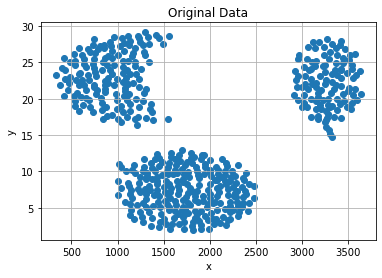

In [269]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1])
    plt.title("Original Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig("../images/originalData1.png")

3
[[0.07100014080614156, 0.05611378972844173], [0.03806033221088762, 0.018515950401613933], [0.02015242866481078, 0.05865666317697917]]


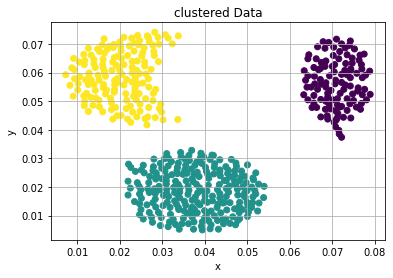

In [277]:
#print(getList(dataset,"cluster"))
for i in range(len(nDataset["matrix"])):
        nDataset["matrix"][i] = normalize(nDataset["matrix"][i])
nDataset = kmeans(nDataset,3)
plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1],c = nDataset["cluster"])
plt.title("clustered Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.savefig("../images/clusteredData1.png") 

In [ ]:
clusterCount = [0]*3
for i in range(5):
    clusterCount[i] = len(getClusterPoints(dataset,i))
    plt.bar([0,1,2,3,4],clusterCount)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)

    plt.savefig("clusterLength.png")